# Código de Huffman

O Coding Huffman é uma técnica de compactar dados para reduzir seu tamanho sem perder qualquer um dos detalhes.Foi desenvolvido pela primeira vez por David Huffman. O Coding Huffman é geralmente útil para compactar os dados nos quais há caracteres que ocorrem freqüentemente.

O processo de codificação é dividido em 4 **passos**:
- Contar a frequência dos símbolos
- Montar uma árvore binária, agrupando os símbolos por sua frequência;
- Percorrer a árvore para montar o dicionário com o novo código de cada símbolo;
- Re-codificar os dados usando esse dicionário.

---

Frequência ordenada:<br>
        ![Frequencia Ordenada](image-2.png)
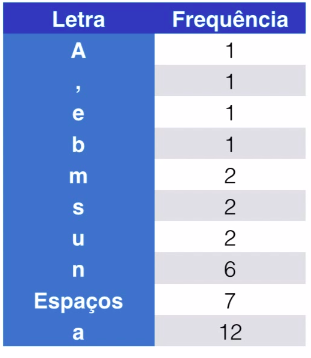
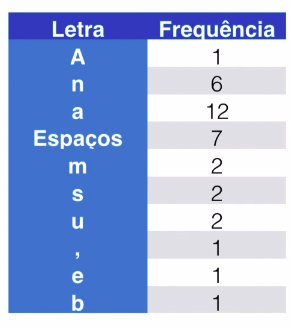

In [148]:
class No():

    def __init__(self, caractere, dire=None, esqu=None):
        self.car = caractere
        self.cod = ''
        self.dir = dire
        self.esq = esqu
        self.frequencia = 1
    
    def add(self):
        self.frequencia += 1
    
    def show(self):
        print(f'caractere: {self.car}')
        print(f'código: {self.cod}')
        print(f'frequencia: {self.frequencia}')

In [149]:
class Arvore():
    
    def __init__(self, texto):
        self.texto = texto
        self.codificado = ''
        self.frequencias = []
        self.raiz = None
        
        self.templateMethod()
        
    def templateMethod(self):
        """Esse método chama os métodos para a próxima etapa"""
        self.contaFrequencia()
        self.ordenaFrequencia()
        self.montarArvore()
        self.montarTabelaCods(no=self.raiz)
        self.codificar()
        self.taxas()

    def busca(self, caractere):
        busca = -1
        i = 0
        while(i < len(self.frequencias) and busca == -1):
            if caractere == self.frequencias[i].car:
                busca = i
            i += 1
        return busca
            
    def contaFrequencia(self): 
        for i in range(len(self.texto)):
            busca = self.busca(self.texto[i])
            if busca == -1:
                '''Este caractere ainda não foi inserido na tabela'''
                self.frequencias.append(No(self.texto[i]))
            else:
                '''Este caractere JÁ foi inserido na tabela, logo só é preciso incrementar a frequencia'''
                self.frequencias[busca].add()
           
    def apresenta(self):
        print('-' * 50)
        for i in self.frequencias:
            print(f'Caractere: {i.car} aparece {i.frequencia} vezes;')
    
    def ordenaFrequencia(self):
        self.frequencias = sorted(self.frequencias, key=lambda x: x.frequencia)

    def pega2menores(self):
        '''Função que retorna os dois nós que possuem as menores frequências'''
        menores = [self.frequencias[0], self.frequencias[1]]
        self.frequencias.pop(0)
        self.frequencias.pop(0)
        return menores

    def criaNovoNoPai(self, menores):
        Novo = No('+')
        Novo.esq = menores[0]
        Novo.dir = menores[1]
        Novo.frequencia = Novo.esq.frequencia + Novo.dir.frequencia
        menores.pop(0); menores.pop(0)
        return Novo

    def montarArvore(self):
        # 1 - Pega os dois menores
        # 2 - Cria um novo Nó pai, sendo que seus filhos são os dois nós pegados recentemente
        # 3 - Coloca o novo nó pai na lista de frequências
        # 4 - Ordena a lista de frequências;
        while( len(self.frequencias) > 1 ):
            menores = self.pega2menores()
            NovoNo = self.criaNovoNoPai(menores)
            self.frequencias.append(NovoNo)
            self.ordenaFrequencia()
        self.raiz = self.frequencias[0]
    
    def ehFolha(self, no):
        if no.dir == None and no.esq == None:
            return True
        else:
            return False
    
    def preOrdem(self, no):
        
        if no != None:
            print('-' * 50)
            no.show()
            self.preOrdem(no.esq)
            self.preOrdem(no.dir)

    def preOrdemSemMais(self, no):
        if no != None:
            if no.car != '+':
                print('-' * 50)
                no.show()
                
            self.preOrdemSemMais(no.esq)
            self.preOrdemSemMais(no.dir)

    def montarTabelaCods(self, no, codigo=''):
        # a[0:len(a)-1]
        if no != None:
            if no.car != '+':
                no.cod = codigo
            else: 
                self.montarTabelaCods(no=no.esq, codigo=codigo+'0') # Ir para a esquerda
                self.montarTabelaCods(no=no.dir, codigo=codigo+'1') # Ir para a direita

        if len(codigo) > 0:
            codigo = codigo[0:len(codigo)-1]
    
    def buscarCar(self, no, car, retorno=None):
        
        if no != None and retorno == None:
            if no.car == car:
                retorno = no
            else:
                retorno = self.buscarCar(no.esq, car, retorno)
                retorno = self.buscarCar(no.dir, car, retorno)

        return retorno

    def codificar(self):
        for i in self.texto:
            no = self.buscarCar(self.raiz, i, None)
            self.codificado += no.cod
        """ print(self.codificado)
        print(f'tamanho do cod: {len(self.codificado)}') """

    def codificarASCII(self):
        retorno = ''
        for i in self.texto:
            retorno += format( ord(i), 'b' )
        """ print(retorno)
        print(len(retorno)) """
    
    def acharFolha(self, no, i):
        if no != None:
            if no.car != '+':
                retorno = [no.car, i]
            elif self.codificado[i] == '1':
                retorno = self.acharFolha(no=no.dir, i=i+1)
            else:
                retorno = self.acharFolha(no=no.esq, i=i+1)
        return retorno

    def decodificar(self):
        decodificado = ''
        i = 0
        while( i < len(self.codificado) ):
            retorno = self.acharFolha(self.raiz, i)
            decodificado += retorno[0]
            i = retorno[1]
        
        if decodificado == self.texto:
            print('Decodificado com sucesso!')

        return decodificado

    def taxas(self):
        tamOriginal = len(self.texto)*8
        tamCod = len(self.codificado)
        taxa = 100 - round(tamCod / (tamOriginal / 100), 2)

        print(f'Tamanho do texto original:.......{tamOriginal} bits')
        print(f'Tamanho do texto codificado:.....{tamCod} bits')
        print(f'Taxa: {taxa}% de redução.')
        print()

In [150]:
arv = Arvore('CASA_PAPEL_HOTEL_PASTEL')

Tamanho do texto original:.......184 bits
Tamanho do texto codificado:.....74 bits
Taxa: 59.78% de redução.



In [151]:
entire_book = ""

arq = open('texto.txt', 'r')

for line in arq:
    entire_book += line

arq.close() 

arv2 = Arvore(entire_book)

Tamanho do texto original:.......3212184 bits
Tamanho do texto codificado:.....1824219 bits
Taxa: 43.21% de redução.

